In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
# нужно если colab использует исключительно мощности компьютера
# на котором запускается проект

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


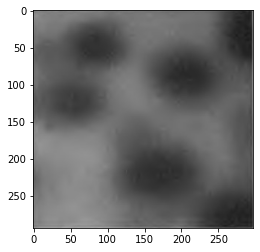

In [4]:
import glob
img = cv2.imread('/content/drive/MyDrive/University/Computer Vision/lab6/image.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)

Бинаризация изображения

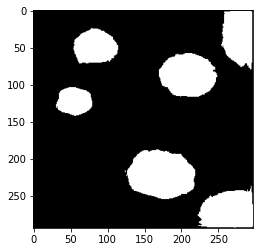

In [5]:
ret, thresh = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

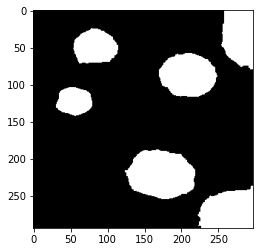

In [6]:
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2) #для удаления шума
plt.imshow(closing, cmap='gray')

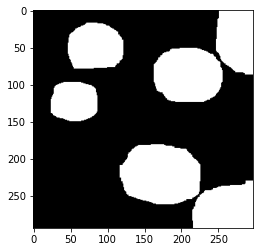

In [7]:
# Маркер, показывающий, где точно находится фон
# Расширение

sure_bg = cv2.dilate(thresh,kernel,iterations=7)
plt.imshow(sure_bg, cmap='gray')

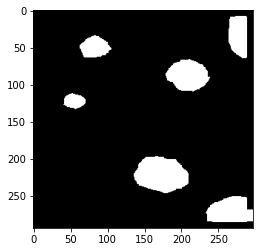

In [8]:
# Маркер, показывающий, где точно находятся объекты
# Сужение

erode = cv2.erode(thresh,kernel,iterations = 7)
plt.imshow(erode, cmap='gray')

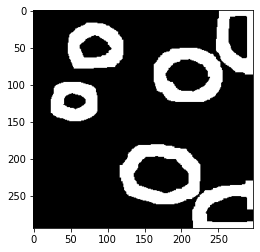

In [9]:
# Градиент - это разница между дилатацией и эрозией изображения
# Вычетание двух изображений

sure_fg = np.uint8(erode)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown, cmap='gray')

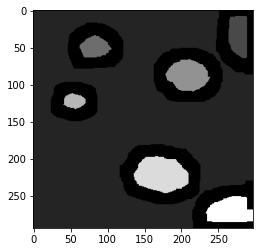

In [10]:
# вычисляет связанные компоненты

ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1
markers[unknown==255] = 0
plt.imshow(markers, cmap='gray')

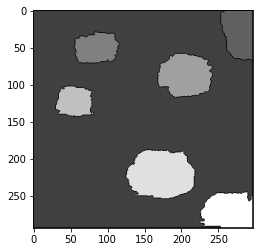

In [13]:
# Водораздел

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(markers, cmap='gray')

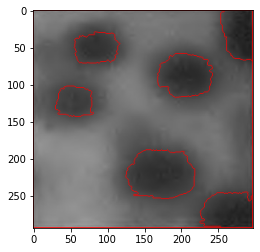

In [12]:
plt.imshow(img)